# Project: Wrangling and Analyze Data

In [3]:
#import necessary libraries

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import os

%matplotlib inline

## Data Gathering
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
# read twitter-archive-enhance dataset to a DataFrame
twitter_archive_enhanced = pd.read_csv('twitter_archive_enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# download image-prediction.tsv dataset using requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Checking for the status of the request sent
# if it returns '200', it means it was successful
response.status_code

200

In [6]:
# Save content to the current directory
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [7]:
# Read the image-predictions file into a DataFrame

image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
""""
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"""

In [8]:
# create a list of dictionaries

with open('tweet_json.txt') as file:
    tweets = []
    for line in file:
        tweets.append(json.loads(line))

In [9]:
# Create a dataframe from tweets list of dictionaries

tweets_data = pd.DataFrame(tweets, columns = ['id', 'retweet_count', 'favorite_count'])

## Assessing Data



In [10]:
# display the twitter_archive table
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [11]:
#show sample of the twitter_archive_enhanced table

twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
888,759846353224826880,NaN,NaN,2016-07-31 20:21:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kirby. He's a Beneblip Cumberpat. Pret...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759846353...,11,10,Kirby,None,None,None,None
1029,745712589599014916,NaN,NaN,2016-06-22 20:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Percy. He fell asleep at the wheel. Ir...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745712589...,7,10,Percy,None,None,None,None
1077,739544079319588864,NaN,NaN,2016-06-05 19:47:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Tyrannosaurus rex. We only rate d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None
530,808134635716833280,NaN,NaN,2016-12-12 02:21:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Milo. I would do terrib...,8.011679e+17,4.196984e+09,2016-11-22 20:58:07 +0000,https://twitter.com/dog_rates/status/801167903...,13,10,Milo,None,None,None,None


In [228]:
# count the values of each unique name

twitter_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
Daisy          7
Toby           7
Buddy          7
an             7
Rusty          6
Stanley        6
Bella          6
Scout          6
Jax            6
Oscar          6
Leo            6
Dave           6
Jack           6
Koda           6
Milo           6
George         5
            ... 
Derby          1
Humphrey       1
Shnuggles      1
Chadrick       1
Noosh          1
Kayla          1
Willow         1
Georgie        1
this           1
Ralph          1
Berb           1
Timmy          1
Snickers       1
Corey          1
Spanky         1
Kendall        1
Chaz           1
Samsom         1
Aqua           1
Brat           1
Ralphson       1
Leonard        1
Tommy          1
Divine         1
Amber          1
Ben            1
Bonaparte      1
Kara          

In [229]:
# get info about the dataset
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [230]:
# get statistical summary about columns with numerical values
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [231]:
# check for duplicates in the dataset

twitter_archive_enhanced.duplicated().sum()

0

In [232]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [233]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
# display the image_predictions table
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [235]:
# show sample of image_predction table

image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
307,671533943490011136,https://pbs.twimg.com/media/CVHEju0XAAEUZRY.jpg,1,hen,0.556524,False,cock,0.442033,False,black_swan,0.001181,False
939,703769065844768768,https://pbs.twimg.com/media/CcRKOzyXEAQO_HN.jpg,2,boxer,0.838994,True,Greater_Swiss_Mountain_dog,0.088800,True,bull_mastiff,0.031684,True
1768,827199976799354881,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681,True,American_Staffordshire_terrier,0.026658,True,boxer,0.019866,True
625,680798457301471234,https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg,1,ram,0.499761,False,hog,0.283795,False,ox,0.067455,False
105,667861340749471744,https://pbs.twimg.com/media/CUS4WJ-UsAEJj10.jpg,1,malamute,0.967275,True,Siberian_husky,0.016168,True,Eskimo_dog,0.011277,True


In [236]:
# get info about the image_predictions dataset
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [237]:
# get statistical summary about columns with numerical values in the image_predictions dataset
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [238]:
# check for duplicates in the image_predictions dataset

image_predictions.duplicated().sum()

0

In [13]:
# display the tweets_data table 
tweets_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [240]:
# show sample of the tweets_data table

tweets_data.sample(5)

,id,retweet_count,favorite_count
889,759557299618865152,1341,5202
1656,683111407806746624,1034,3736
1387,700167517596164096,836,2903
2268,667502640335572993,231,563
905,757741869644341248,3710,7613


In [241]:
# get info about the tweets_data dataset
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [242]:
# get statistical summary about columns with numerical values in the tweets_data dataset
tweets_data.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [243]:
# check for duplicates in the tweets_data dataset

tweets_data.duplicated().sum()

0

### Quality issues 

1. wrong datatypes (tweet_id, in_reply_to_status_id, in_reply_to_user_id,timestamp, id columns)
2. retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should be removed because we interest in tweet
3. some of the values in rating_denominator column in `twitter_archive_enhanced` table are not 10
4. some of the values in rating_numerator column in `twitter_archive_enhanced` table are less than 10
5. Nulls represented as (none) in name column in `twitter_archive_enhanced` table
6. The conf (p1_conf, p2_conf,p3_conf) in `image_predictions` table should be confidence for easier understanding
7. There are weird dog name in the name column in `twitter_archive_enhanced` table such as 'a','an','the', etc, 
8. id column name should be "tweet_id" instead of "id" in `tweets_data` table

### Tidiness issues

1. There should be just one column for doggo, floofer, pupper, and puppo in the `twitter_archive_enhanced` table
2. combine the three dataframes in one dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [244]:
# Make copies of original pieces of data
clean_twitter_archive_enhanced = twitter_archive_enhanced.copy()
clean_image_predictions = image_predictions.copy()
clean_tweets_data = tweets_data.copy()

### Issue #1: 
wrong datatypes: tweet_id, in_reply_to_status_id, in_reply_to_user_id,timestamp, id columns

#### Define: 
use astype method to change the type of all the above columns

#### Code

In [245]:
clean_twitter_archive_enhanced['tweet_id'] = clean_twitter_archive_enhanced['tweet_id'].astype(str)
clean_twitter_archive_enhanced['timestamp'] = clean_twitter_archive_enhanced['timestamp'].astype('datetime64[ns]')
clean_twitter_archive_enhanced['in_reply_to_status_id'] = clean_twitter_archive_enhanced['tweet_id'].astype(str)
clean_twitter_archive_enhanced['in_reply_to_user_id'] = clean_twitter_archive_enhanced['tweet_id'].astype(str)
clean_image_predictions['tweet_id'] = clean_image_predictions['tweet_id'].astype(str)
clean_tweets_data['id'] = clean_tweets_data['id'].astype(str)

#### Test

In [246]:
print('Datatype of tweet_id: ',clean_twitter_archive_enhanced['tweet_id'].dtypes)
print('Datatype of timestamp: ',clean_twitter_archive_enhanced['timestamp'].dtypes)
print('Datatype of in_reply_to_status_id: ',clean_twitter_archive_enhanced['in_reply_to_status_id'].dtypes)
print('Datatype of in_reply_to_user_id: ',clean_twitter_archive_enhanced['in_reply_to_user_id'].dtypes)
print('Datatype of tweet_id: ',clean_image_predictions['tweet_id'].dtypes)
print('Datatype of id: ',clean_tweets_data['id'].dtypes)

Datatype of tweet_id:  object
Datatype of timestamp:  datetime64[ns]
Datatype of in_reply_to_status_id:  object
Datatype of in_reply_to_user_id:  object
Datatype of tweet_id:  object
Datatype of id:  object


### Issue #2:
retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp should be removed from the `twitter_archive_enhanced`table because we interest in tweet

#### Define
delete the following columns; retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code

In [247]:
#remove the retweets and replies rows first

clean_twitter_archive_enhanced = clean_twitter_archive_enhanced[clean_twitter_archive_enhanced.retweeted_status_id.isnull()]
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced[clean_twitter_archive_enhanced.retweeted_status_user_id.isnull()]
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced[clean_twitter_archive_enhanced.retweeted_status_timestamp.isnull()]

In [248]:
# drop the columns

clean_twitter_archive_enhanced = clean_twitter_archive_enhanced.drop(columns=['retweeted_status_id' , 'retweeted_status_user_id' ,'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp'])

#### Test

In [249]:
clean_twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


### Issue #3:  
some of the values in rating_denominator column in `twitter_archive_enhanced` table are not 10

#### Define
replace the values that are not 10 with 10


#### Code

In [250]:
clean_twitter_archive_enhanced.rating_denominator = clean_twitter_archive_enhanced.rating_denominator.replace(range(0,1000) , 10 )

#### Test

In [251]:
clean_twitter_archive_enhanced.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

### Issue #4:
some of the values in rating_numerator column in the `twitter_archive_enhanced` table are less than 10

#### Define
replace any value less than 10 with 10

#### Code

In [252]:
clean_twitter_archive_enhanced.loc[clean_twitter_archive_enhanced["rating_numerator"] < 10, "rating_numerator"] = 10

#### Test

In [253]:
(clean_twitter_archive_enhanced.rating_numerator < 10).sum()

0

### Issue #5:
Nulls represented as (none) in name column in the `twitter_archive_enhanced` table

#### Define
replace none value with numpy nan

#### Code

In [254]:
clean_twitter_archive_enhanced.name = clean_twitter_archive_enhanced.name.replace("None", value = np.nan )

#### Test

In [255]:
clean_twitter_archive_enhanced.name.isnull().sum()

680

### Issue #6:
The conf (p1_conf, p2_conf,p3_conf) in `image_predictions` table should be confidence for easier understanding

#### Define
change the name using rename method

#### Code

In [256]:
clean_image_predictions.rename(columns={'p1_conf': 'p1_confident'}, inplace=True)
clean_image_predictions.rename(columns={'p2_conf': 'p2_confident'}, inplace=True)
clean_image_predictions.rename(columns={'p3_conf': 'p3_confident'}, inplace=True)

#### Test

In [257]:
clean_image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_confident', 'p1_dog', 'p2',
       'p2_confident', 'p2_dog', 'p3', 'p3_confident', 'p3_dog'],
      dtype='object')

### Issue #7:
 There are weird dog name in the name column in `clean_twitter_archive_enhanced` table such as 'a','an','the', so on. They all start with lowercase character

#### Define
remove all dog names that start with a lowercase character

#### Code

In [258]:
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced[clean_twitter_archive_enhanced['name'].str[0].str.isupper().fillna(False)]

#### Test

In [259]:
clean_twitter_archive_enhanced.name.value_counts()

Charlie     11
Lucy        11
Cooper      10
Oliver      10
Penny        9
Tucker       9
Winston      8
Sadie        8
Lola         8
Daisy        7
Toby         7
Stanley      6
Bailey       6
Oscar        6
Jax          6
Bella        6
Bo           6
Koda         6
Dave         5
Bentley      5
Buddy        5
Milo         5
Louis        5
Leo          5
Chester      5
Scout        5
Rusty        5
Clarence     4
Clark        4
Oakley       4
            ..
Dobby        1
Boston       1
Kloey        1
Jarvis       1
Fillup       1
Leonard      1
Sonny        1
Ralphson     1
Ralph        1
Pablo        1
Lorelei      1
Dawn         1
Dewey        1
Zara         1
Tupawc       1
Molly        1
Fletcher     1
Georgie      1
Berb         1
Klein        1
Timmy        1
Bradley      1
Corey        1
Spanky       1
Ruffles      1
Chaz         1
Samsom       1
Jed          1
Aqua         1
Tessa        1
Name: name, Length: 930, dtype: int64

### Issue #8:
id column name should be "tweet_id" instead of "id

#### Define
rename id with tweet_id

#### Code

In [260]:
clean_tweets_data.rename(columns = {'id':'tweet_id'}, inplace = True)

#### Test

In [261]:
clean_tweets_data.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

## Tidiness issues
1. There should be just one column for doggo, floofer, pupper, and puppo
2. combine the three dataframes in one dataframe

### Issue #1:
There should be just one column for doggo, floofer, pupper, and puppo in the `twitter_archive_enhanced` table

#### Define
extract dog stage from text columns and put it in new column 'dog stage' then drop the columns 'doggo', 'pupper', 'floofer', 'puppo'

#### Code

In [262]:
# handle none
clean_twitter_archive_enhanced.doggo.replace('None', '', inplace=True)
clean_twitter_archive_enhanced.floofer.replace('None', '', inplace=True)
clean_twitter_archive_enhanced.pupper.replace('None', '', inplace=True)
clean_twitter_archive_enhanced.puppo.replace('None', '', inplace=True)

# merge into column
clean_twitter_archive_enhanced['dog_stage'] = clean_twitter_archive_enhanced.doggo + clean_twitter_archive_enhanced.floofer + clean_twitter_archive_enhanced.pupper + clean_twitter_archive_enhanced.puppo

# handle multiple stages
clean_twitter_archive_enhanced.loc[clean_twitter_archive_enhanced.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
clean_twitter_archive_enhanced.loc[clean_twitter_archive_enhanced.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
clean_twitter_archive_enhanced.loc[clean_twitter_archive_enhanced.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
clean_twitter_archive_enhanced.loc[clean_twitter_archive_enhanced.dog_stage == '', 'dog_stage'] = np.nan

In [263]:
clean_twitter_archive_enhanced = clean_twitter_archive_enhanced.drop(columns=['doggo', 'floofer','pupper', 'puppo'])

#### Test

In [264]:
clean_twitter_archive_enhanced.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage'],
      dtype='object')

In [265]:
clean_twitter_archive_enhanced.dog_stage.value_counts()

pupper           121
doggo             38
puppo             16
floofer            5
doggo, pupper      4
Name: dog_stage, dtype: int64

### Issue #2:
combine the three dataframes into one dataframe

#### Define
merge the 3 DataFrames 

#### Code

In [266]:
twitter_archive_master = pd.merge(clean_twitter_archive_enhanced, clean_image_predictions , on= "tweet_id" , how="left") 
twitter_archive_master = pd.merge(twitter_archive_master, clean_tweets_data , on= "tweet_id" , how="left")

#### Test

In [267]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_confident,p1_dog,p2,p2_confident,p2_dog,p3,p3_confident,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [268]:
twitter_archive_master.shape

(1391, 22)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [ ]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data

### Analyzing

In [269]:
#highest rating 

twitter_archive_master.rating_numerator.max()

1776

In [270]:
#lowest rating

twitter_archive_master.rating_numerator.min()

10

In [271]:
# most favorite 

twitter_archive_master.favorite_count.max()

107956

In [272]:
# least favorite

twitter_archive_master.favorite_count.min()

107

In [273]:
# top 5 dog names

twitter_archive_master.name.value_counts()[0:5]

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Penny       9
Name: name, dtype: int64

### Insights:
1. The highest rating_numerator receive is 1776 and the lowest is 10.
2. The tweet with the highest number of favorite count, has a count of 107956 and the lowest is 107.
3. The most popular dog name is Charlie and Lucy, both with a count of 11

### Visualization

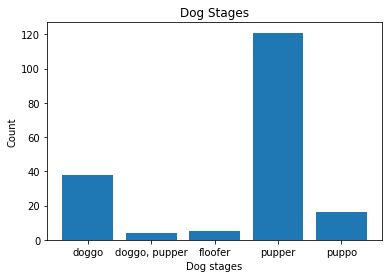

In [274]:
# Plotting a bar chart for the dog stages

plt.bar(x= clean_twitter_archive_enhanced['dog_stage'].value_counts().index, height= clean_twitter_archive_enhanced.dog_stage.value_counts())
plt.title("Dog Stages")
plt.xlabel('Dog stages')
plt.ylabel('Count')
plt.show()

The most popular dog stage is Pupper

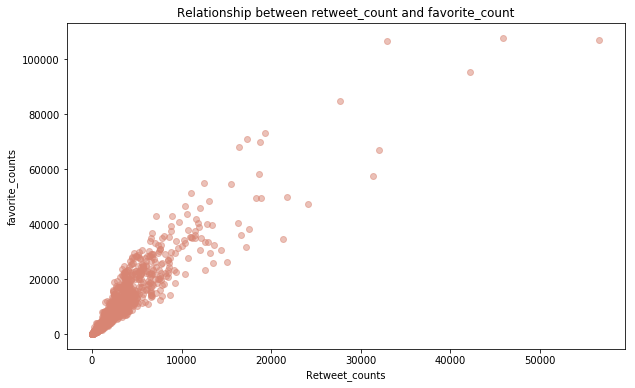

In [275]:
x= twitter_archive_master.retweet_count
y= twitter_archive_master.favorite_count
plt.figure(figsize=(10,6))
plt.scatter(x,y, color= '#D88573', alpha = 0.5)
plt.title('Relationship between retweet_count and favorite_count', {'fontsize': 12})
plt.xlabel("Retweet_counts")
plt.ylabel("favorite_counts")
plt.show()

There is a fairly strong positive correlation between retweet and favorite count

### Data used for the Analysis and visualization

The data I used is the `twitter_archive_master`dataset, which I got from combining 3 different datasets (`clean_twitter_archive_enhanced`, `clean_image_predictions`, `clean_tweets_data`)